In [1]:
from utils import Utils
import pyreadr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import openai
import os
%matplotlib inline

In [2]:
url ="https://github.com/qsideinstitute/DATA2LIFT/blob/main/RawData/PUMSRawData.Rdata"
Utils.download_file(url)

File downloaded successfully. File name: PUMSRawData.Rdata


True

In [3]:
result = pyreadr.read_r('./data/data.rdata')
data = result['rawPumsData']
df = pd.DataFrame(data)
df.head(3)

,SERIALNO,SPORDER,WGTP,PWGTP,AGEP,PUMA,ST,SCH,SEX,ESR,HISP,RAC1P
0,2021GQ0000026,1.0,0.0,13.0,85.0,00800,01,1,1,6,01,1
1,2021GQ0000031,1.0,0.0,51.0,67.0,00800,01,1,2,6,01,2
2,2021GQ0000063,1.0,0.0,17.0,74.0,01200,01,1,1,6,01,1


<Axes: title={'center': 'Gender Distribution'}, xlabel='SEX'>

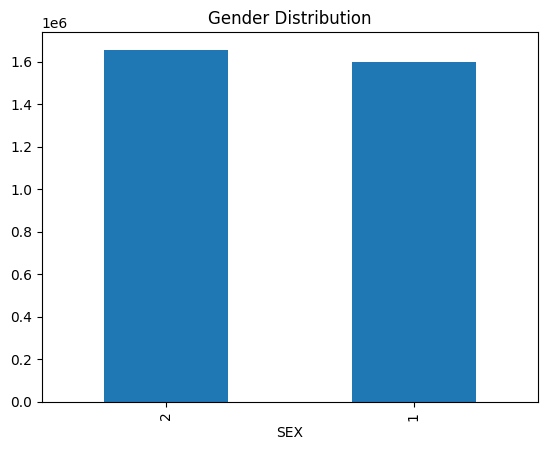

In [4]:
df['SEX'].value_counts().plot(kind='bar',title="Gender Distribution")

<Axes: title={'center': 'Race Distribution'}, xlabel='RAC1P'>

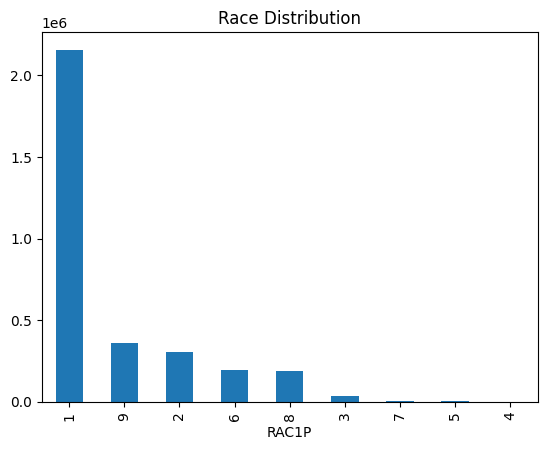

In [5]:
df['RAC1P'].value_counts().plot(kind='bar',title="Race Distribution")

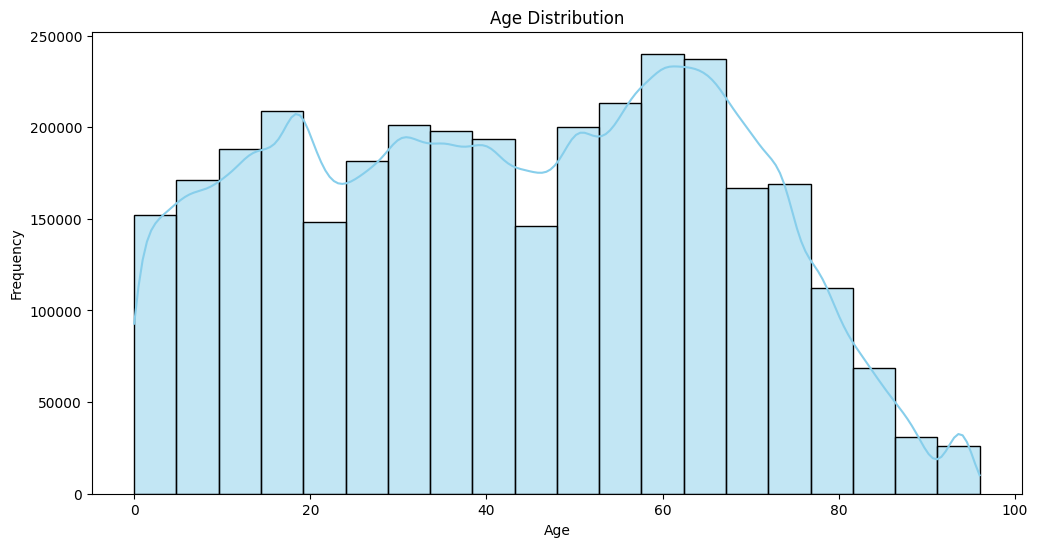

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(df['AGEP'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

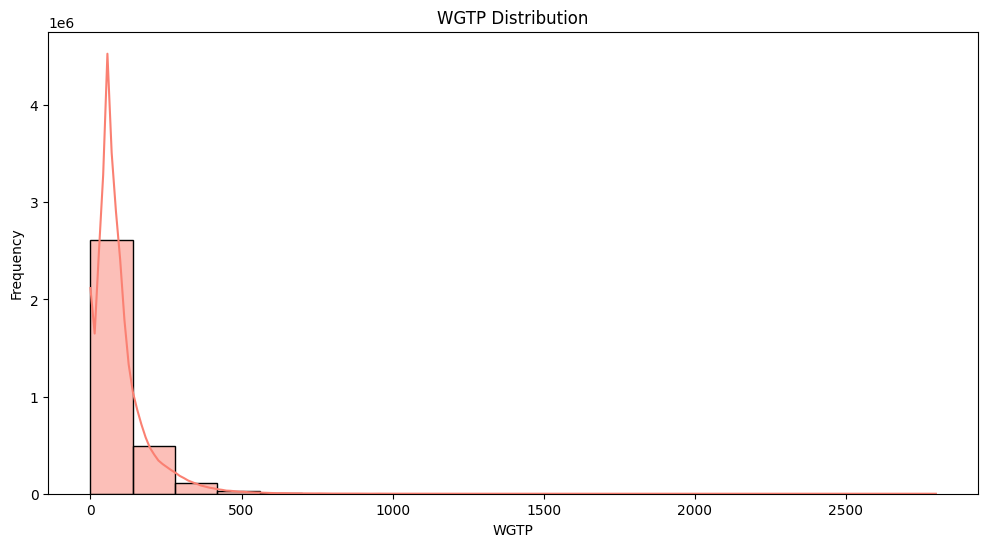

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(df['WGTP'], bins=20, kde=True, color='salmon')
plt.title('WGTP Distribution')
plt.xlabel('WGTP')
plt.ylabel('Frequency')
plt.show()

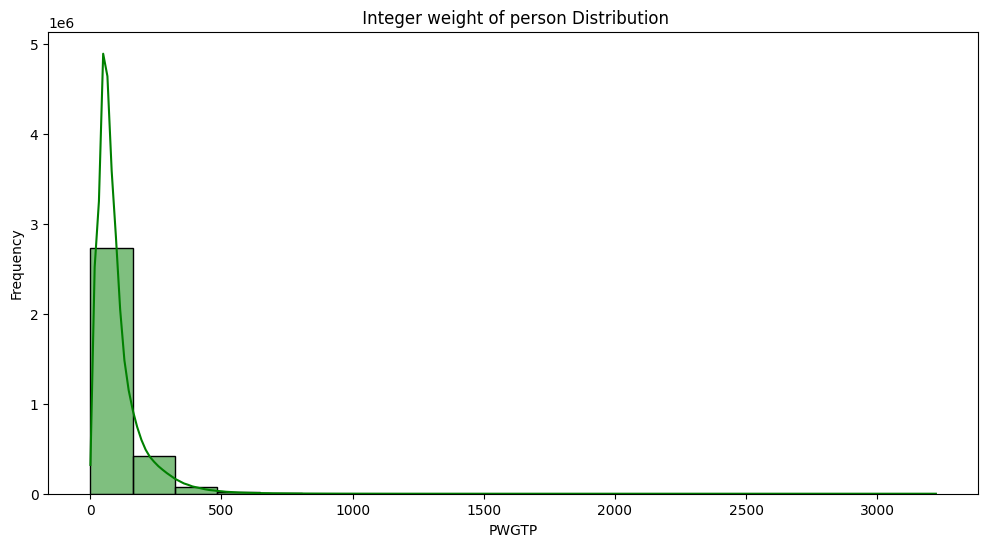

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df['PWGTP'], bins=20, kde=True, color='green')
plt.title(' Integer weight of person Distribution')
plt.xlabel('PWGTP')
plt.ylabel('Frequency')
plt.show()

In [9]:
integer_columns = df.select_dtypes(include=[np.int64]).columns
integer_columns
df.dtypes

SERIALNO     object
SPORDER     float64
WGTP        float64
PWGTP       float64
AGEP        float64
PUMA         object
ST           object
SCH          object
SEX          object
ESR          object
HISP         object
RAC1P        object
dtype: object

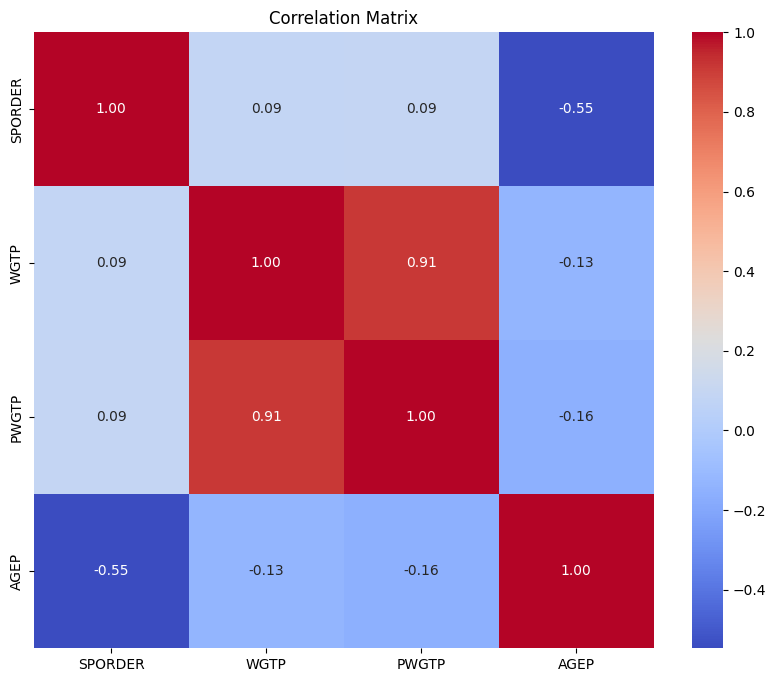

In [10]:
integer_columns = df.select_dtypes(include=[np.float64]).columns
df_integer = df[integer_columns]
plt.figure(figsize=(10, 8))
sns.heatmap(df_integer.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
  

In [11]:
df_integer.corr().to_string()


'          SPORDER      WGTP     PWGTP      AGEP\nSPORDER  1.000000  0.085817  0.087590 -0.546929\nWGTP     0.085817  1.000000  0.911013 -0.133091\nPWGTP    0.087590  0.911013  1.000000 -0.157402\nAGEP    -0.546929 -0.133091 -0.157402  1.000000'

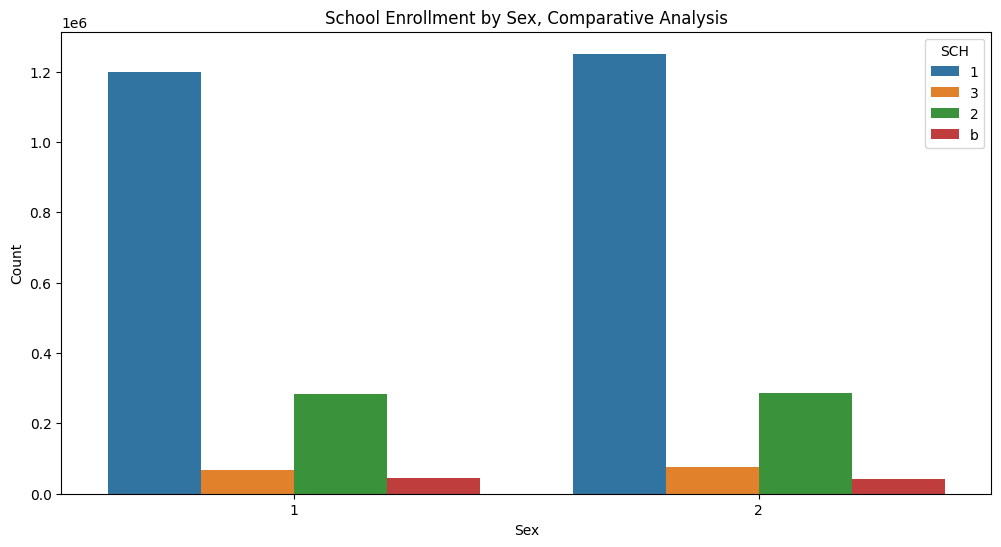

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x='SEX', hue='SCH', data=df)
plt.title('School Enrollment by Sex, Comparative Analysis')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

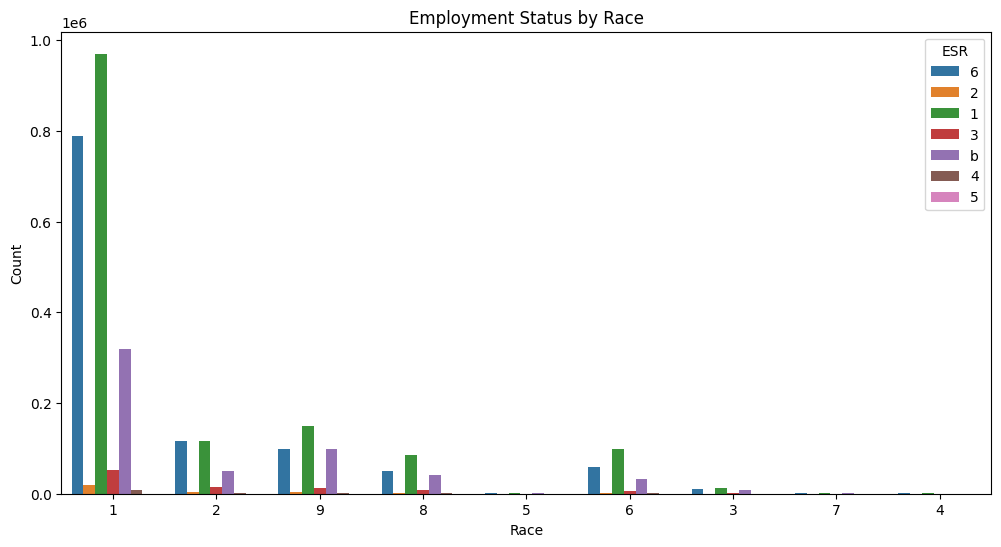

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='RAC1P', hue='ESR', data=df)
plt.title('Employment Status by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

In [14]:
from explain import explain

openai_key = os.getenv('openai_key')
driver = explain(openai_key)
driver.correlation_martix(df_integer.corr().to_string())

'The correlation matrix provides insights into the relationships between the integer columns in the data. In this matrix:\n\n- The variables are highly correlated with themselves (as seen in the diagonal line of 1.000), which is expected.\n- There is a negative correlation coefficient (-0.546929) between AGE and SPORDER, indicating a possible inverse relationship between age and the order of the individual in the dataset.\n- There is a moderate positive correlation between WGTP and PWGTP (0.911013), suggesting that the weights of people are related to each other.\n- The correlations between the other variables are relatively weak, indicating little to no linear relationship between them.\n\nBased on this correlation matrix, we can infer potential patterns and dependencies within the data, which can guide further analysis and understanding of the relationships between the integer columns in the dataset.'

In [15]:
driver.age_distribution(df,"AGEP")

'The plot displays the distribution of ages in the dataset. The x-axis represents age, while the y-axis represents frequency. The data is divided into 20 bins to visualize the distribution. The plot shows how the ages are distributed across the dataset, with the highest frequency occurring in certain age ranges.'

In [24]:
df2 = df.copy()
df2 = df2.drop('SERIALNO', axis=1)
df2['PUMA'] = df2['PUMA'].astype('category').cat.codes
df2['ST'] = df2['ST'].astype('category').cat.codes
df2['HISP'] = df2['HISP'].astype('category').cat.codes
df2

,SPORDER,WGTP,PWGTP,AGEP,PUMA,ST,SCH,SEX,ESR,HISP,RAC1P
0,1.0,0.0,13.0,85.0,89,0,1,1,6,0,1
1,1.0,0.0,51.0,67.0,89,0,1,2,6,0,2
2,1.0,0.0,17.0,74.0,149,0,1,1,6,0,1
3,1.0,0.0,61.0,16.0,199,0,3,1,6,0,1
4,1.0,0.0,15.0,83.0,68,0,1,1,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3252594,1.0,69.0,69.0,67.0,1,8,1,1,1,0,1
3252595,1.0,87.0,87.0,79.0,1,8,1,1,6,0,1
3252596,1.0,58.0,58.0,56.0,2,8,1,2,1,0,2
3252597,1.0,80.0,80.0,74.0,4,8,1,2,6,0,2


<Axes: title={'center': 'Hispanic Origin Distribution'}, xlabel='HISP'>

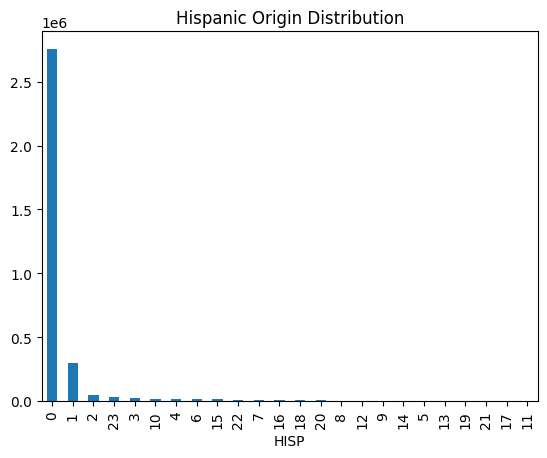

In [30]:
df2['HISP'].value_counts().plot(kind='bar',title="Hispanic Origin Distribution")

<Axes: title={'center': 'Public Use Microdata Area Distribution'}, xlabel='PUMA'>

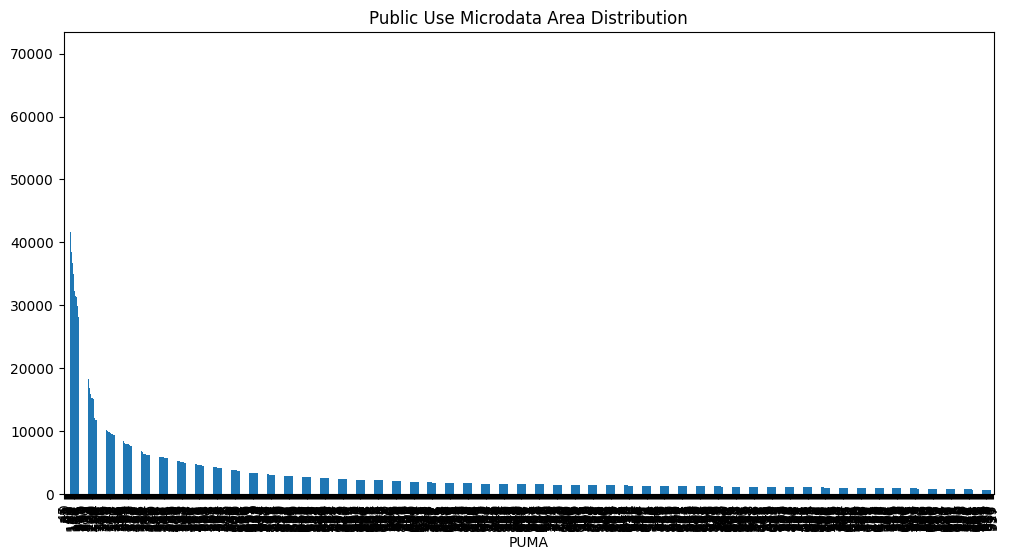

In [33]:
df2['PUMA'].value_counts().plot(kind='bar',title="Public Use Microdata Area Distribution",figsize=(12, 6))

In [23]:
 
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
  

ValueError: could not convert string to float: 'b'

<Figure size 1000x800 with 0 Axes>

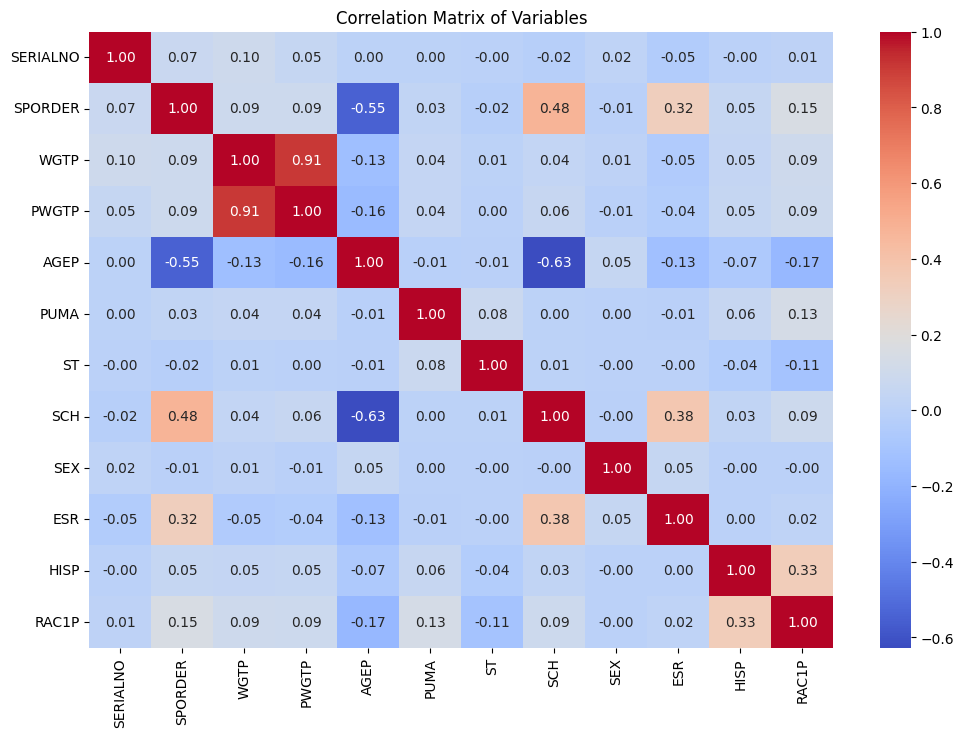

In [35]:
df['SERIALNO'] = df['SERIALNO'].astype('category').cat.codes
df['PUMA'] = df['PUMA'].astype('category').cat.codes
df['ST'] = df['ST'].astype('category').cat.codes
df['SCH'] = df['SCH'].astype('category').cat.codes
df['ESR'] = df['ESR'].astype('category').cat.codes
df['HISP'] = df['HISP'].astype('category').cat.codes
df['RAC1P'] = df['RAC1P'].astype('category').cat.codes

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()